### Importing libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("data/fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [17]:
df.shape

(159, 7)

In [19]:
df = pd.get_dummies(df)
df.tail()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
154,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False
158,19.9,13.8,15.0,16.2,2.9322,1.8792,False,False,False,False,False,True,False


In [6]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.326795,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.216380,-0.205732,-0.037845,0.563514,-0.213250,-0.467420,0.050731
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.233391,-0.205957,-0.036090,0.552780,-0.218048,-0.479775,0.053777
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.327170,-0.198718,-0.105478,0.522894,-0.205072,-0.488397,0.052864
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Species_Bream,0.326795,0.216380,0.233391,0.327170,0.772443,0.319347,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Species_Parkki,-0.186034,-0.205732,-0.205957,-0.198718,-0.000547,-0.194147,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Species_Perch,-0.033240,-0.037845,-0.036090,-0.105478,-0.191405,0.144021,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Species_Pike,0.310641,0.563514,0.552780,0.522894,-0.101810,0.137722,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


In [7]:
X = df.drop(['Weight'],axis = "columns")
y = df["Weight"]

### Split data into Train and test

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=1)
X_train.shape

(119, 12)

### Build a model

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
print("intrcept: ", model.intercept_)
print("slopes: ", model.coef_)
print("R squared: ", model.score(X,y))

intrcept:  -791.7343125834232
slopes:  [ -77.54961986   79.82351542   32.07795278   -7.39940573    6.27375101
  -52.45900441  101.23781327   34.41437005 -374.32402364   -7.14175994
  307.1979751    -8.92537042]
R squared:  0.9344082354012225


In [12]:
print("R^2: ", model.score(X_train, y_train))


R^2:  0.9406750115439331


In [13]:
y_predict = model.predict(X_test)
RMSE = root_mean_squared_error(y_predict, y_test)
print("RMSE: ", RMSE)

RMSE:  103.43601101632


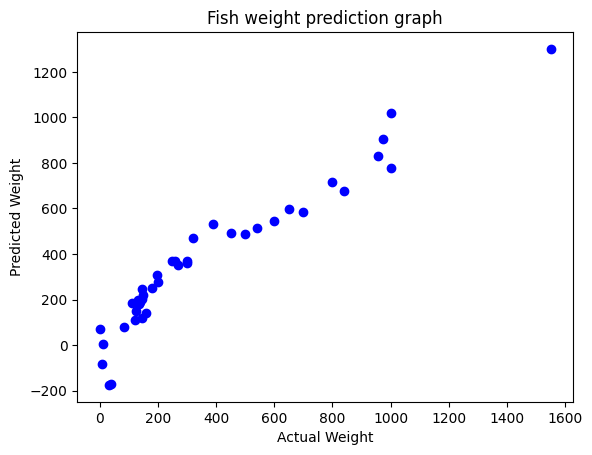

In [28]:
plt.scatter(y_test, y_predict, color = 'blue')
plt.title("Fish weight prediction graph")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.show()